In [5]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import ndimage

In [6]:
folder_path='/content/drive/MyDrive/posedetection/keypoints_from_videos_json/hamstring_stretch/'

In [7]:
def angle_between_points(a, b, c):

    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [14]:
#check for width and height should be multiple of 16

count_of_squats = 0
squat_pos = 0
prev_squat_pos = 0
angles_list=[]
# i = 0
for json_file in sorted(os.listdir(folder_path)):
  # print(json_file)
  f=open(folder_path+json_file,)
  raw_json=json.load(f)
  x=list(raw_json.items())[1][1][0]['pose_keypoints_2d']
  x=np.array(x).reshape(18,3)
  # print(x)
  f.close()
  try:
    # calculate left leg angle
    # center_11=int(x[11][0]*1920),int(x[11][1]*1080)#left hip value
    # center_12=int(x[12][0]*1920),int(x[12][1]*1080)#left knee value
    # center_13=int(x[13][0]*1920),int(x[13][1]*1080)#left ankle value
    center_8=int(x[8][0]),int(x[8][1])#right hip value
    center_9=int(x[9][0]),int(x[9][1])#right knee value
    center_10=int(x[10][0]),int(x[10][1])#right ankle value

    #check for squat
    squat_left_angle = int(angle_between_points(center_8, center_9, center_10))
    
    squat_pos = 1 if squat_left_angle >= 100 else 0
    if prev_squat_pos - squat_pos == 1:
      count_of_squats +=1

    prev_squat_pos = squat_pos

    print(squat_left_angle, squat_pos, count_of_squats)

    angles_list.append(squat_left_angle)
  except:
    pass

  

68 0 0
68 0 0
68 0 0
68 0 0
68 0 0
68 0 0
68 0 0
68 0 0
69 0 0
69 0 0
69 0 0
69 0 0
69 0 0
69 0 0
69 0 0
69 0 0
69 0 0
70 0 0
69 0 0
69 0 0
70 0 0
69 0 0
70 0 0
70 0 0
70 0 0
69 0 0
69 0 0
70 0 0
69 0 0
69 0 0
72 0 0
71 0 0
69 0 0
72 0 0
74 0 0
77 0 0
78 0 0
66 0 0
68 0 0
75 0 0
79 0 0
84 0 0
89 0 0
92 0 0
161 1 0
162 1 0
162 1 0
160 1 0
101 1 0
162 1 0
161 1 0
160 1 0
163 1 0
166 1 0
164 1 0
166 1 0
167 1 0
163 1 0
169 1 0
167 1 0
165 1 0
162 1 0
171 1 0
163 1 0
160 1 0
160 1 0
161 1 0
161 1 0
160 1 0
160 1 0
161 1 0
160 1 0
161 1 0
160 1 0
159 1 0
160 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
160 1 0
160 1 0
160 1 0
161 1 0
160 1 0
160 1 0
162 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


1 0
160 1 0
168 1 0
170 1 0
143 1 0
146 1 0
149 1 0
150 1 0
151 1 0
151 1 0
179 1 0
179 1 0
179 1 0
179 1 0
179 1 0
179 1 0
179 1 0
151 1 0
151 1 0
150 1 0
150 1 0
149 1 0
150 1 0
150 1 0
178 1 0
179 1 0
179 1 0
176 1 0
178 1 0
178 1 0
178 1 0
179 1 0
178 1 0
179 1 0
179 1 0
177 1 0
179 1 0
174 1 0
174 1 0
173 1 0
175 1 0
175 1 0
178 1 0
174 1 0
170 1 0
162 1 0
164 1 0
165 1 0
161 1 0
161 1 0
162 1 0
162 1 0
162 1 0
162 1 0
162 1 0
162 1 0
162 1 0
164 1 0
161 1 0
162 1 0
164 1 0
161 1 0
164 1 0
161 1 0
161 1 0
160 1 0
160 1 0
160 1 0
159 1 0
159 1 0
159 1 0
159 1 0
160 1 0
160 1 0
160 1 0
160 1 0
159 1 0
159 1 0
159 1 0
159 1 0
160 1 0
160 1 0
160 1 0
160 1 0
160 1 0
160 1 0
161 1 0
160 1 0
160 1 0
160 1 0
159 1 0
159 1 0
160 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
158 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
158 1 0
159 1 0
158 1 0
159 1 0
158 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
159 1 0
161 1 0
159 1 0
160 1 0
162 1 0
160 1 0
159 1 0
161 1 0
159 1 0
159 

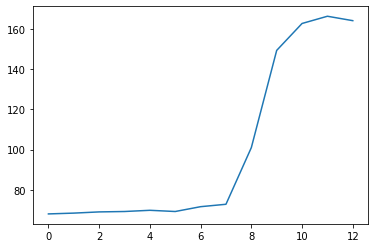

In [9]:
avg_angles=[]
for i in range(0,len(angles_list)//5,5):
  avg_angles.append(np.mean(angles_list[i:i+5]))
plt.plot(avg_angles)

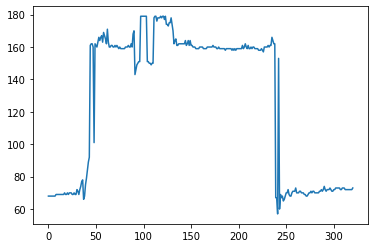

In [15]:
plt.plot(angles_list)

In [11]:
len(avg_angles)

13

In [12]:
min(angles_list)

57

In [13]:
max(angles_list)

179

In [ ]:
x=np.array(angles_list)-135

In [ ]:
x=x/135

In [ ]:
x=np.abs(x-1)*100

In [ ]:
plt.plot(angles_list)
plt.plot(x)
plt.show()

In [ ]:
len(angles_list)

COUNTING REPS BASED ON THRESHOLD

In [ ]:
counter=0
prev_check=0

for i in x:
  pos = 1 if i >= 50 else 0
  if prev_check - pos == 1:
    counter +=1
  prev_check = pos
    


In [ ]:
counter